# Denoising of signal using Fourier transformation

In [457]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import math
rn.seed("assignment6")

In [482]:
def func(N0,Np):
    N=N0*Np
    t=np.zeros(N)
    y=np.zeros(N,complex)
    T=1
    s=T/N0
    for i in range(1,N):
        t[i]=t[i-1]+s
    tc=np.copy(t)
    for i in range(0,N):
        y.real[i]=np.sin(2*np.pi/T*t[i])
    yc=np.copy(y)
    return t,y,tc,yc,N,s
def noise(y,A):
    y1=np.zeros(N,complex)
    for i in range(0,N):
        y1.real[i]=y.real[i]+rn.uniform(-A,A)
    y1c=np.copy(y1)
    return y1,y1c
def FFT(y, N, d ):
    if N==1:
        return y
    else:
        y1 = np.array(y[0::(2*d)], complex)
        y2 = np.array(y[d::(2*d)], complex)
        y[0:N//2] = FFT(y1, N//2, d)[0:N//2]
        y[N//2:N] = FFT(y2, N//2, d)[0:N//2]

        for k in range(N//2):
            t = y[k]
            exp = np.exp(-2*np.pi*1j/N*k)
            y[k] = t+exp*y[k+N//2]
            y[k+N//2] = t-exp*y[k+N//2]
        return y
def filt(F):
    for i in range(N):
        if(abs(F.imag[i])<max(F.imag)-1):
            F[i] = 0
        else:
            F.imag[i] *= -1
    F = FFT(F, N, 1)/N
    return F
def err(y,F):
    s=0
    for i in range(0,N):
        s=s+(y.real[i]-F.real[i])**2/N
    s=s**(1/2)/N
    return s

Part 1. Parameters: N<sub>0</sub> = 32, N<sub>p</sub> = 4, A = 0.25

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


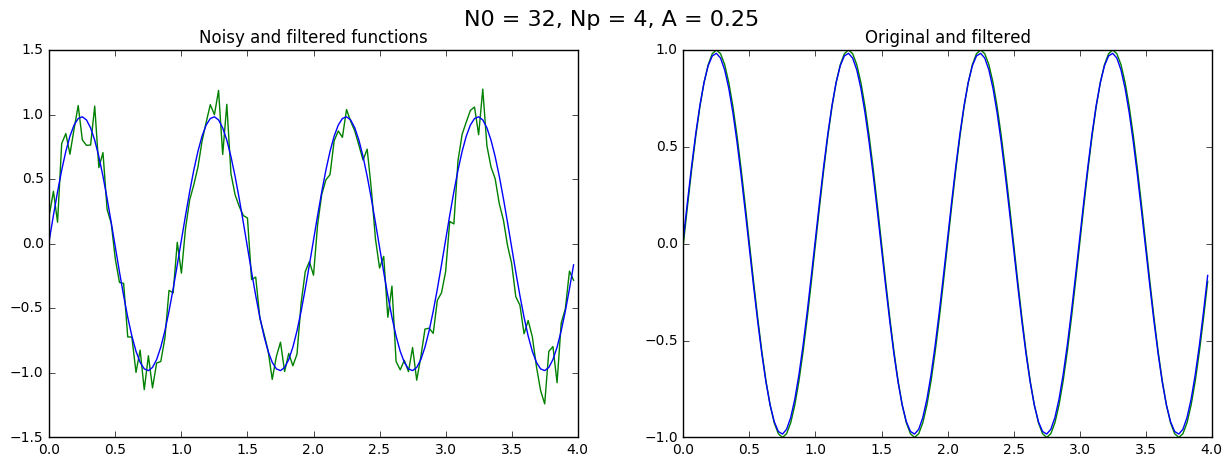

0.00018395736134573849

In [484]:
t,y,tc,yc,N,s=func(32,4)
y1,y1c=noise(yc,0.25)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')
fig.suptitle("N0 = 32, Np = 4, A = 0.25",fontsize=16)
plt.show()
err1=err(y,F1)
err1

Part 2. Parameters: N<sub>0</sub> = 16 and N<sub>0</sub> = 8, N<sub>p</sub> = 4, A = 0.25 

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


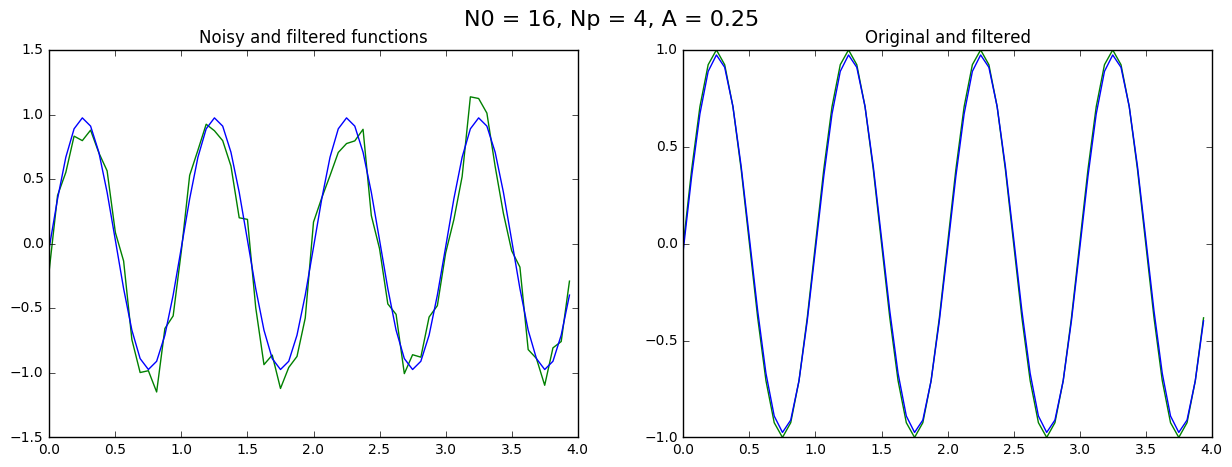

0.00041643843704666626

In [485]:
t,y,tc,yc,N,s=func(16,4)
y1,y1c=noise(yc,0.25)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')
fig.suptitle("N0 = 16, Np = 4, A = 0.25",fontsize=16)
plt.show()
err1=err(y,F1)
err1

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


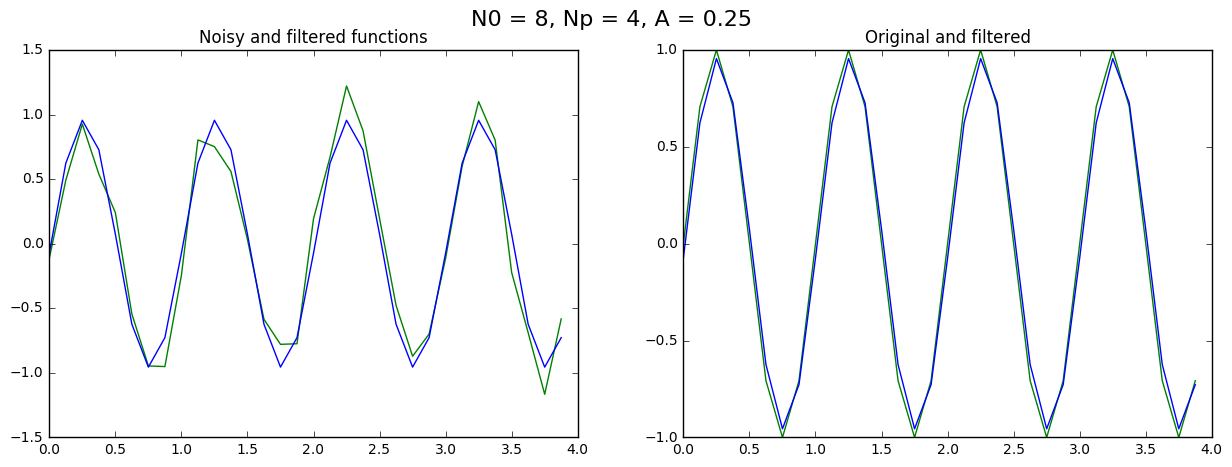

0.0018976441643808932

In [486]:
t,y,tc,yc,N,s=func(8,4)
y1,y1c=noise(yc,0.25)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')  
fig.suptitle("N0 = 8, Np = 4, A = 0.25",fontsize=16)
plt.show()
err1=err(y,F1)
err1

Part 3. Parameters: N<sub>0</sub> = 32, N<sub>p</sub> = 2 and N<sub>p</sub> = 8 and N<sub>p</sub> = 16, A = 0.25

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


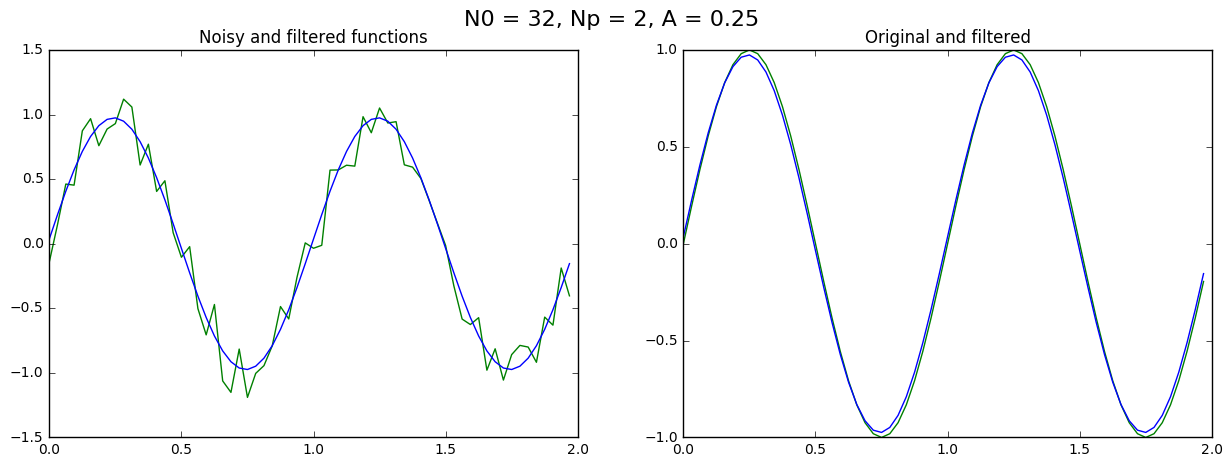

0.00049207878761127531

In [487]:
t,y,tc,yc,N,s=func(32,2)
y1,y1c=noise(yc,0.25)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')   
fig.suptitle("N0 = 32, Np = 2, A = 0.25",fontsize=16)
plt.show()
err1=err(y,F1)
err1

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


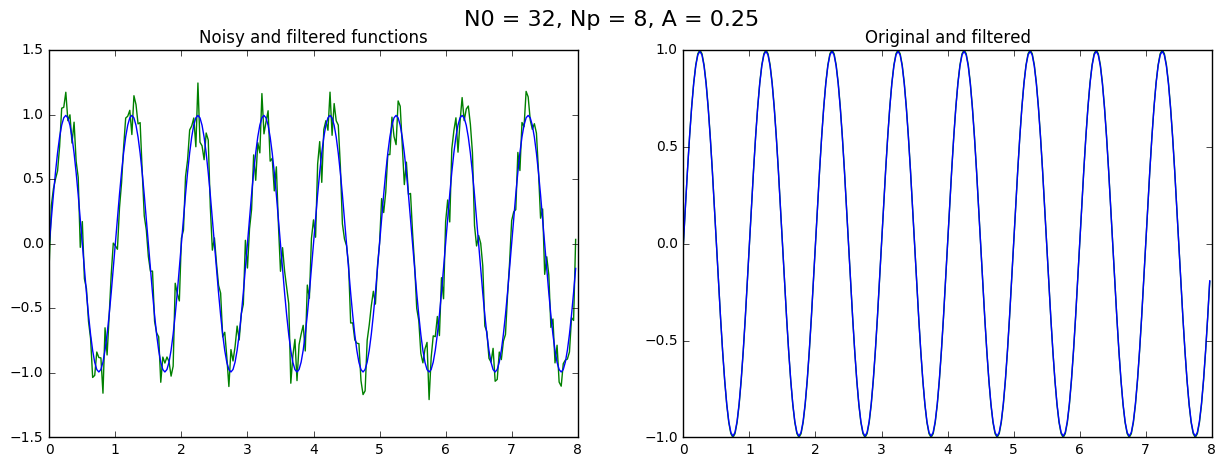

1.968202507687213e-05

In [488]:
t,y,tc,yc,N,s=func(32,8)
y1,y1c=noise(yc,0.25)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')  
fig.suptitle("N0 = 32, Np = 8, A = 0.25",fontsize=16)
plt.show()
err1=err(y,F1)
err1

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


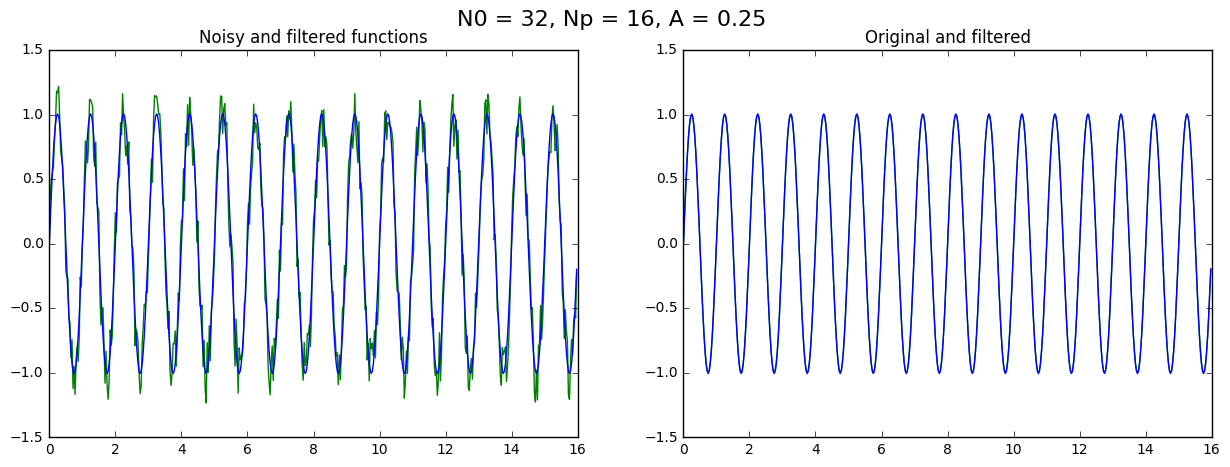

7.4449941960481009e-06

In [489]:
t,y,tc,yc,N,s=func(32,16)
y1,y1c=noise(yc,0.25)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')   
fig.suptitle("N0 = 32, Np = 16, A = 0.25",fontsize=16)
plt.show()
err1=err(y,F1)
err1

Part 4. Parameters: N<sub>0</sub> = 32, N<sub>p</sub> = 4, A = 0.1 and A = 0.5 and A = 1 

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


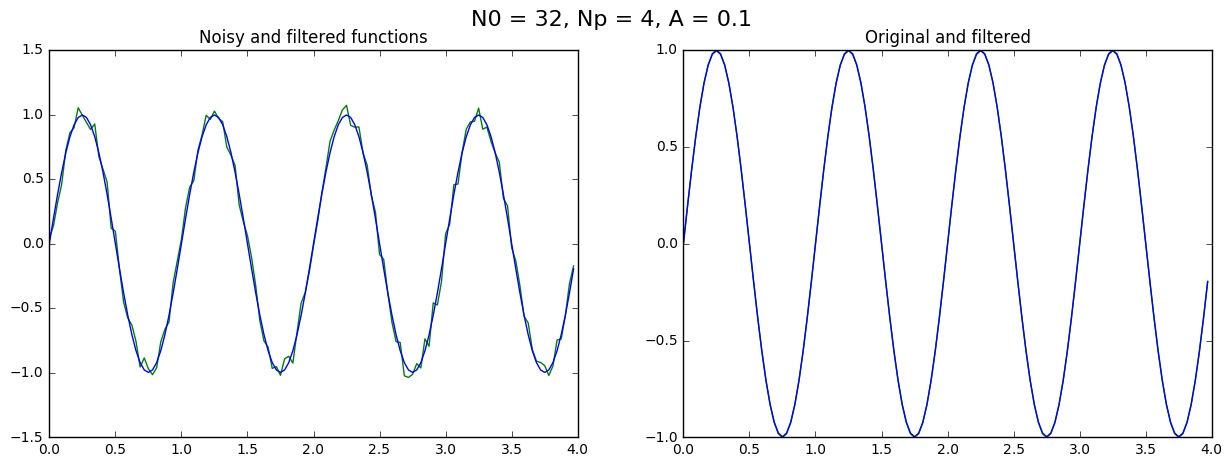

2.0167464993441956e-05

In [490]:
t,y,tc,yc,N,s=func(32,4)
y1,y1c=noise(yc,0.1)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')    
fig.suptitle("N0 = 32, Np = 4, A = 0.1",fontsize=16)
plt.show()
err1=err(y,F1)
err1

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


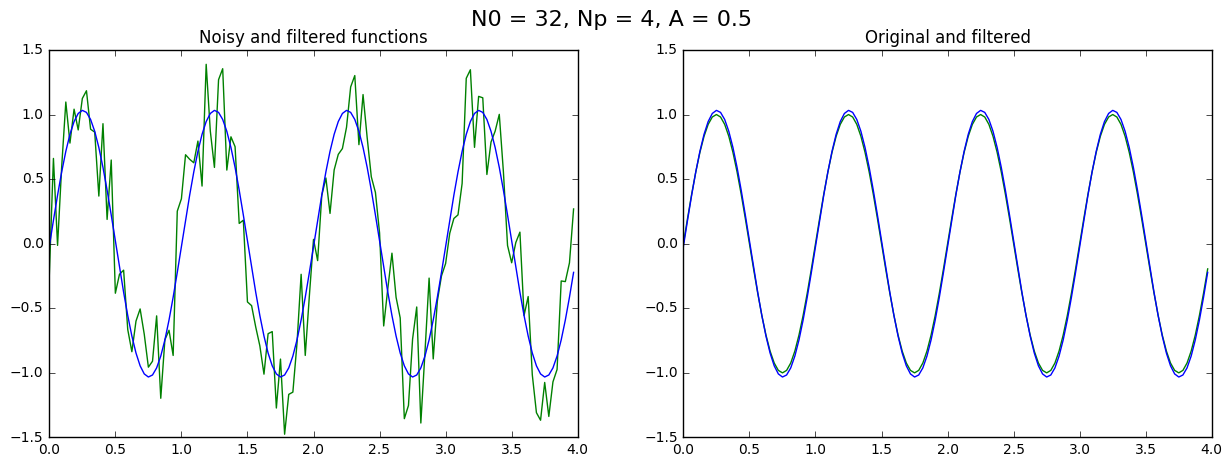

0.00021232536959632514

In [491]:
t,y,tc,yc,N,s=func(32,4)
y1,y1c=noise(yc,0.5)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')    
fig.suptitle("N0 = 32, Np = 4, A = 0.5",fontsize=16)
plt.show()
err1=err(y,F1)
err1

C:\Users\Lera\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


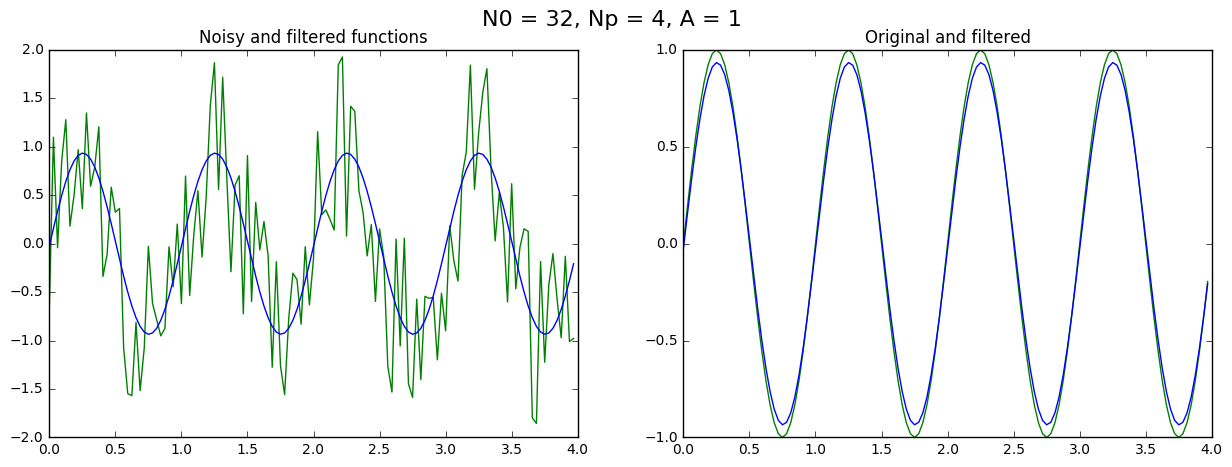

0.00038622828764105774

In [492]:
t,y,tc,yc,N,s=func(32,4)
y1,y1c=noise(yc,1)
F1=np.zeros(N,complex)
F1=FFT(y1c,N,1)
F1=filt(F1)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(t,y1,'g')
ax[0].plot(t,F1,'b')
ax[0].set_title('Noisy and filtered functions')    
ax[1].plot(t,y,'g')
ax[1].plot(t,F1,'b')
ax[1].set_title('Original and filtered')    
fig.suptitle("N0 = 32, Np = 4, A = 1",fontsize=16)
plt.show()
err1=err(y,F1)
err1

In the first part it can be seen that graph of filtered noisy fuction looks very similar to the original fuction. Error has the power of -4.

In the second part the N<sub>0</sub>, which is the number of points per period, was changed. It is clear from graphs nd numerically, that the error has increased, as the N0 was decreased. Such result is predictable, as greater number of points gave more accurate data, that allows to reconstruct function with less error.

In the third part the number of periods covered, N<sub>p</sub>, was changed. Similarly to changes at N<sub>0</sub>, the error increased as the N<sub>p</sub> was decreased.

In the fourth part, the range of amplitude of added noise, A, was changed. It is clear, that amplitude of noise close to the amplitude of original function would result in greater error. As it would more difficult to differ the noise from original function. This prediction has been proved experimentally in part 4 of this assignment.